In [ ]:
#Load Libraries
import pandas as pd
from pandas import to_datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

In [ ]:
#Create MAPE formula
def mape(actual, forecast):
    """
    Compute mean absolute percentage error (MAPE).
    :param actual: numpy array of actual values
    :param forecast: numpy array of forecasted values
    :return: mape as float
    """
    mask = actual != 0
    return (np.fabs(actual - forecast)/actual)[mask].mean() * 100

In [ ]:
sales = pd.read_excel("/content/sales.xlsx", sheet_name = "sales")

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

#Amstel Lager

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/3mp7n65k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/c_sffmi5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14023', 'data', 'file=/tmp/tmpx941vn9x/3mp7n65k.json', 'init=/tmp/tmpx941vn9x/c_sffmi5.json', 'output', 'file=/tmp/tmpx941vn9x/prophet_modelo12t7ik5/prophet_model-20230405211650.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:16:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:16:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


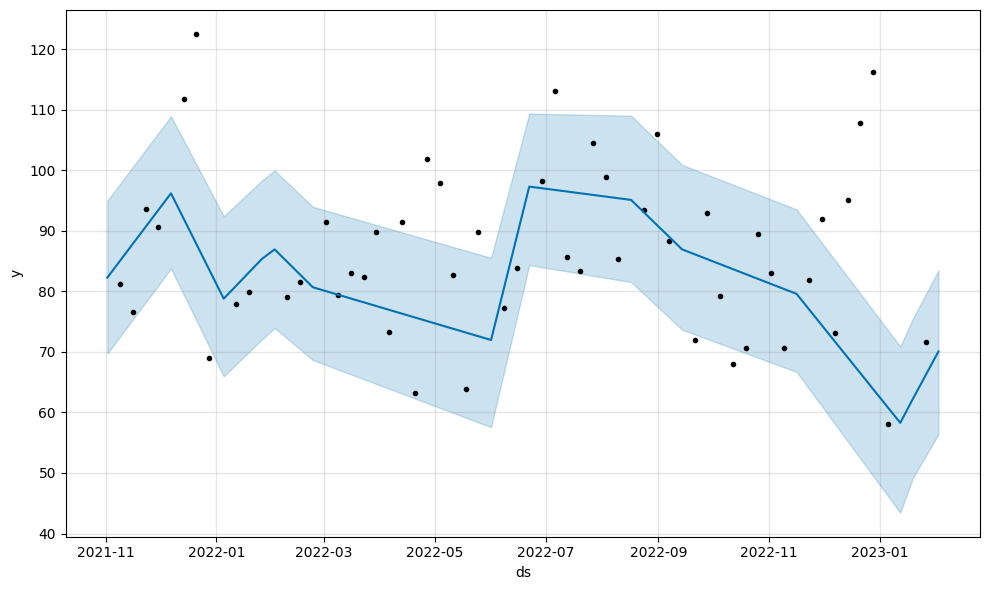

In [ ]:
#Create data subset
df_Amstel_Lager = sales[sales['brand_name'] == 'AMSTEL LAGER']
#Remove SAB
df_Amstel_Lager = df_Amstel_Lager[~df_Amstel_Lager['brand_owner'].str.contains('SAB')]
#Remove unnecessary columns - everything except date and sales
df_Amstel_Lager = df_Amstel_Lager.loc[:, ["date", "volume_hl"]]
# group the dataframe by date and sum the volume_hl column
df_Amstel_Lager = df_Amstel_Lager.groupby('date')['volume_hl'].sum().reset_index()
df_Amstel_Lager = (
    df_Amstel_Lager
    .set_index("date")
)
#Create copy of date
df_Amstel_Lager['date'] = df_Amstel_Lager.index
# prepare expected column names
df_Amstel_Lager.columns = ['y', 'ds']
df_Amstel_Lager['ds']= pd.to_datetime(df_Amstel_Lager['ds'])
#Split into training and test sets
from sklearn.model_selection import train_test_split
train_Amstel_Lager, test_Amstel_Lager = train_test_split(df_Amstel_Lager, test_size=0.2, random_state=42)
# define the model
model_Amstel_Lager = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, seasonality_mode = 'multiplicative', holidays_prior_scale=10)
# fit the model
model_Amstel_Lager.fit(train_Amstel_Lager)
#make predictions on test data
test_preds_Amstel_Lager = pd.DataFrame(test_Amstel_Lager['ds'])
test_preds_Amstel_Lager.columns = ['ds']
test_preds_Amstel_Lager['ds']= to_datetime(test_preds_Amstel_Lager['ds'])
#Make out of sample predictions
test_preds_Amstel_Lager = model_Amstel_Lager.predict(test_preds_Amstel_Lager)
# plot forecast
ax = model_Amstel_Lager.plot(test_preds_Amstel_Lager)
pyplot.show()

In [ ]:
#Calculate MAPE
pred_values_Amstel_Lager = test_preds_Amstel_Lager['yhat'].values
actuals_Amstel_Lager = test_Amstel_Lager['y'].values
mape(actuals_Amstel_Lager, pred_values_Amstel_Lager)
#22.358368503225346

22.358368503225346

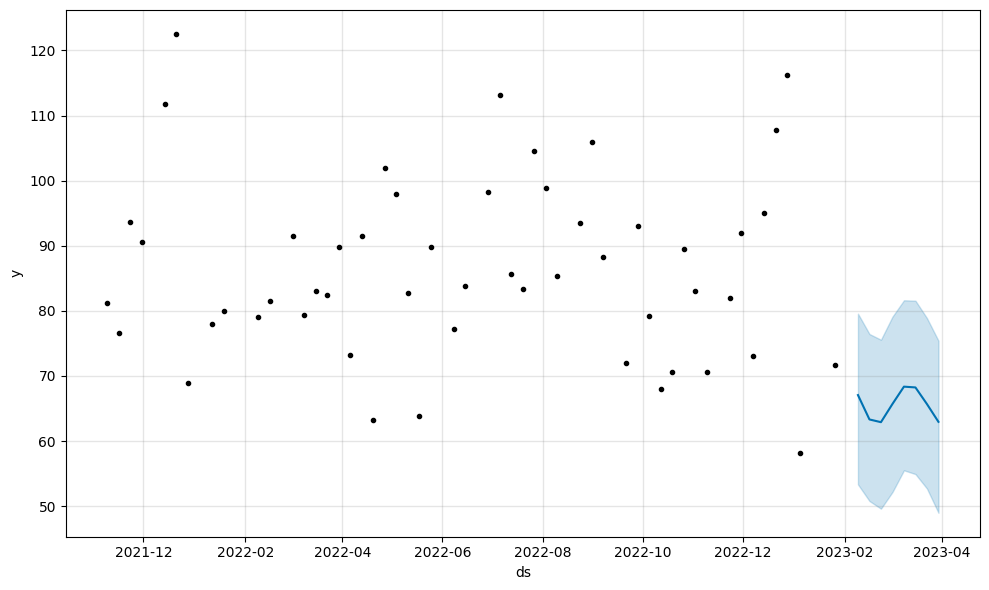

In [ ]:
# define the period for which we want a prediction
future_df_Amstel_Lager = ['2023-02-09','2023-02-16','2023-02-23','2023-03-02','2023-03-09','2023-03-16','2023-03-23','2023-03-30']
future_df_Amstel_Lager = pd.DataFrame(future_df_Amstel_Lager)
future_df_Amstel_Lager.columns = ['ds']
future_df_Amstel_Lager['ds']= to_datetime(future_df_Amstel_Lager['ds'])
#make predictions
forecast_Amstel_Lager = model_Amstel_Lager.predict(future_df_Amstel_Lager)
#Plot the forecasts
model_Amstel_Lager.plot(forecast_Amstel_Lager)
pyplot.show()

In [ ]:
#summarize the forecast
print(forecast_Amstel_Lager[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(20))

          ds       yhat  yhat_lower  yhat_upper
0 2023-02-09  67.058352   53.330980   79.563617
1 2023-02-16  63.310530   50.783490   76.438793
2 2023-02-23  62.892121   49.603779   75.558342
3 2023-03-02  65.688500   52.163298   79.099182
4 2023-03-09  68.350760   55.497837   81.620750
5 2023-03-16  68.229805   54.918062   81.556173
6 2023-03-23  65.675638   52.699154   78.883380
7 2023-03-30  62.944267   48.972136   75.407959


# AMSTEL RADLER

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/c1pzyazq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/1jme8lrv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16969', 'data', 'file=/tmp/tmpx941vn9x/c1pzyazq.json', 'init=/tmp/tmpx941vn9x/1jme8lrv.json', 'output', 'file=/tmp/tmpx941vn9x/prophet_modelbsfou3v2/prophet_model-20230405213542.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:35:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:35:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


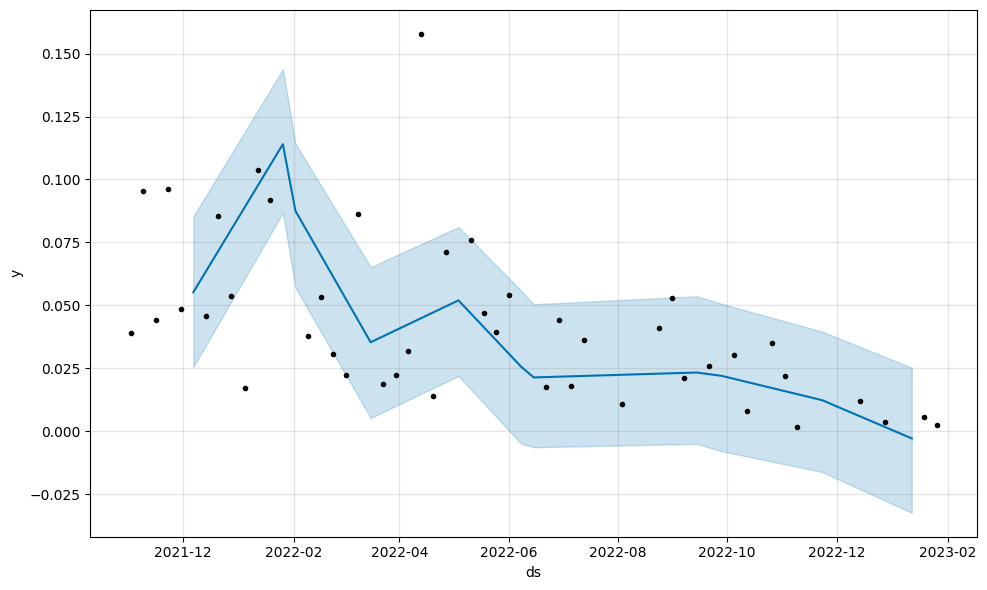

In [ ]:
#Create data subset
df_Amstel_Radler = sales[sales['brand_name'] == 'AMSTEL RADLER']
#Remove SAB
df_Amstel_Radler = df_Amstel_Radler[~df_Amstel_Radler['brand_owner'].str.contains('SAB')]
#Remove unnecessary columns - everything except date and sales
df_Amstel_Radler = df_Amstel_Radler.loc[:, ["date", "volume_hl"]]

#group the dataframe by date and sum the volume_hl column
df_Amstel_Radler = df_Amstel_Radler.groupby('date')['volume_hl'].sum().reset_index()
df_Amstel_Radler = (
df_Amstel_Radler
.set_index("date")
)
#Create copy of date
df_Amstel_Radler['date'] = df_Amstel_Radler.index

#prepare expected column names
df_Amstel_Radler.columns = ['y', 'ds']
df_Amstel_Radler['ds']= pd.to_datetime(df_Amstel_Radler['ds'])
#Split into training and test sets
from sklearn.model_selection import train_test_split
train_Amstel_Radler, test_Amstel_Radler = train_test_split(df_Amstel_Radler, test_size=0.2, random_state=42)

#define the model
model_Amstel_Radler = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, seasonality_mode = 'multiplicative', holidays_prior_scale=10)

#fit the model
model_Amstel_Radler.fit(train_Amstel_Radler)
#make predictions on test data
test_preds_Amstel_Radler = pd.DataFrame(test_Amstel_Radler['ds'])
test_preds_Amstel_Radler.columns = ['ds']
test_preds_Amstel_Radler['ds']= pd.to_datetime(test_preds_Amstel_Radler['ds'])
#Make out of sample predictions
test_preds_Amstel_Radler = model_Amstel_Radler.predict(test_preds_Amstel_Radler)

#plot forecast
ax = model_Amstel_Radler.plot(test_preds_Amstel_Radler)
pyplot.show()

In [ ]:
#Calculate MAPE
pred_values_Amstel_Radler = test_preds_Amstel_Radler['yhat'].values
actuals_Amstel_Radler = test_Amstel_Radler['y'].values
mape(actuals_Amstel_Radler, pred_values_Amstel_Radler)
#86.10162741909849

87.44849217560599

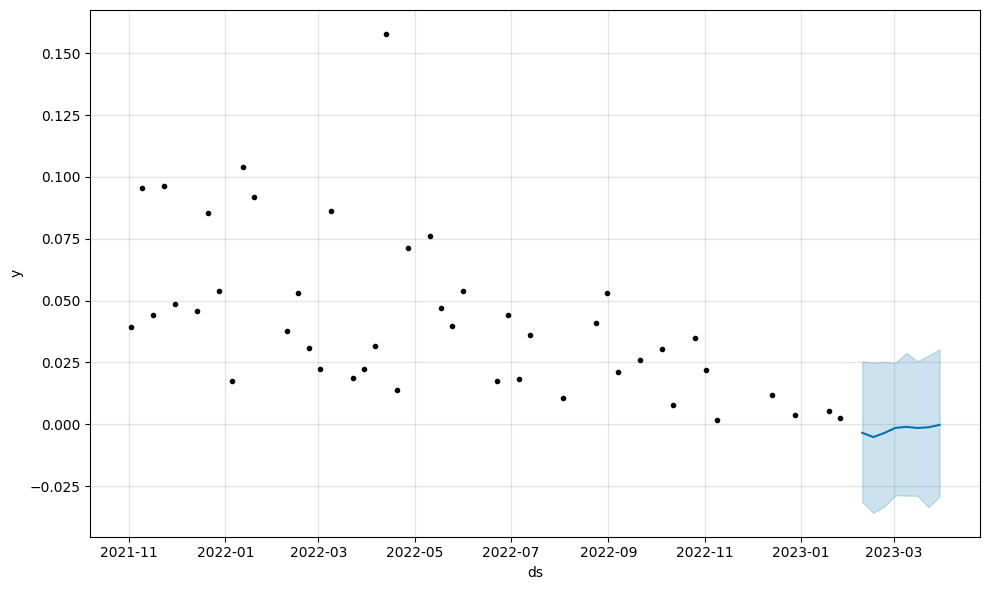

In [ ]:
future_df_Amstel_Radler = ['2023-02-09','2023-02-16','2023-02-23','2023-03-02','2023-03-09','2023-03-16','2023-03-23','2023-03-30']
future_df_Amstel_Radler = pd.DataFrame(future_df_Amstel_Radler)
future_df_Amstel_Radler.columns = ['ds']
future_df_Amstel_Radler['ds']= to_datetime(future_df_Amstel_Radler['ds'])
#make predictions
forecast_Amstel_Radler = model_Amstel_Radler.predict(future_df_Amstel_Radler)
#Plot the forecasts
model_Amstel_Radler.plot(forecast_Amstel_Radler)
pyplot.show()

In [ ]:
#summarize the forecast
print(forecast_Amstel_Radler[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(20))

          ds      yhat  yhat_lower  yhat_upper
0 2023-02-09 -0.003447   -0.031400    0.025474
1 2023-02-16 -0.005163   -0.035771    0.024877
2 2023-02-23 -0.003506   -0.033298    0.025280
3 2023-03-02 -0.001448   -0.028655    0.024792
4 2023-03-09 -0.001035   -0.028838    0.028830
5 2023-03-16 -0.001486   -0.028901    0.025492
6 2023-03-23 -0.001205   -0.033458    0.027764
7 2023-03-30 -0.000249   -0.029231    0.030344


# Heineken

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/34s1c094.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/85t5e7k2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87280', 'data', 'file=/tmp/tmpx941vn9x/34s1c094.json', 'init=/tmp/tmpx941vn9x/85t5e7k2.json', 'output', 'file=/tmp/tmpx941vn9x/prophet_modeln8aatuty/prophet_model-20230405214331.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:43:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:43:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


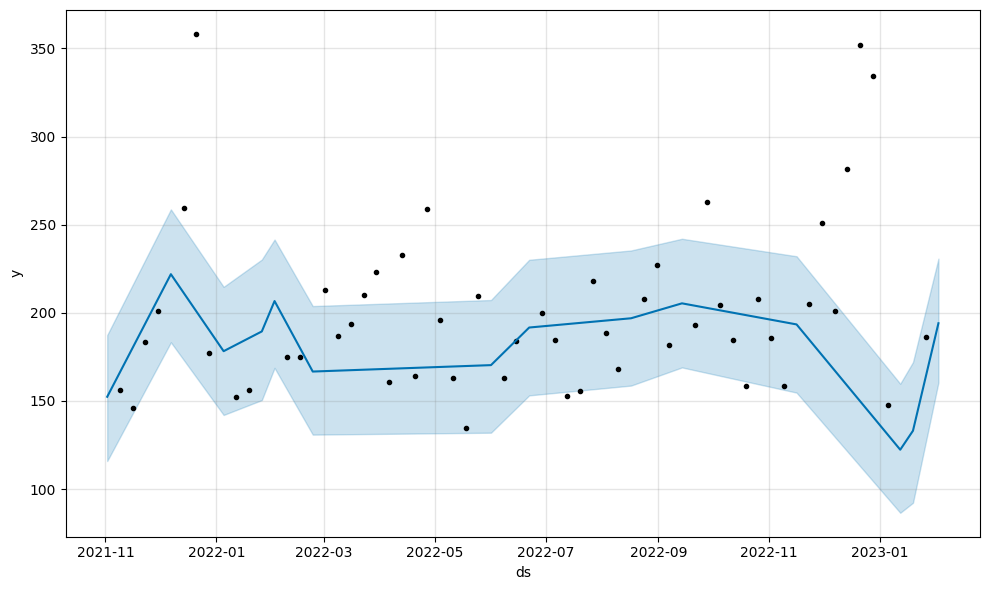

In [ ]:
#Create data subset
df_Heineken = sales[sales['brand_name'] == 'HEINEKEN']
#Remove SAB
df_Heineken = df_Heineken[~df_Heineken['brand_owner'].str.contains('SAB')]
#Remove unnecessary columns - everything except date and sales
df_Heineken = df_Heineken.loc[:, ["date", "volume_hl"]]

#group the dataframe by date and sum the volume_hl column
df_Heineken = df_Heineken.groupby('date')['volume_hl'].sum().reset_index()
df_Heineken = (
df_Heineken
.set_index("date")
)
#Create copy of date
df_Heineken['date'] = df_Heineken.index

#prepare expected column names
df_Heineken.columns = ['y', 'ds']
df_Heineken['ds']= pd.to_datetime(df_Heineken['ds'])
#Split into training and test sets
from sklearn.model_selection import train_test_split
train_Heineken, test_Heineken = train_test_split(df_Heineken, test_size=0.2, random_state=42)

#define the model
model_Heineken = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, seasonality_mode = 'multiplicative', holidays_prior_scale=10)

#fit the model
model_Heineken.fit(train_Heineken)
#make predictions on test data
test_preds_Heineken = pd.DataFrame(test_Heineken['ds'])
test_preds_Heineken.columns = ['ds']
test_preds_Heineken['ds']= pd.to_datetime(test_preds_Heineken['ds'])
#Make out of sample predictions
test_preds_Heineken = model_Heineken.predict(test_preds_Heineken)

#plot forecast
ax = model_Heineken.plot(test_preds_Heineken)
pyplot.show()

In [ ]:
#Calculate MAPE
pred_values_Heineken = test_preds_Heineken['yhat'].values
actuals_Heineken = test_Heineken['y'].values
mape(actuals_Heineken, pred_values_Heineken)
#12.180027656878009

12.180027656878009

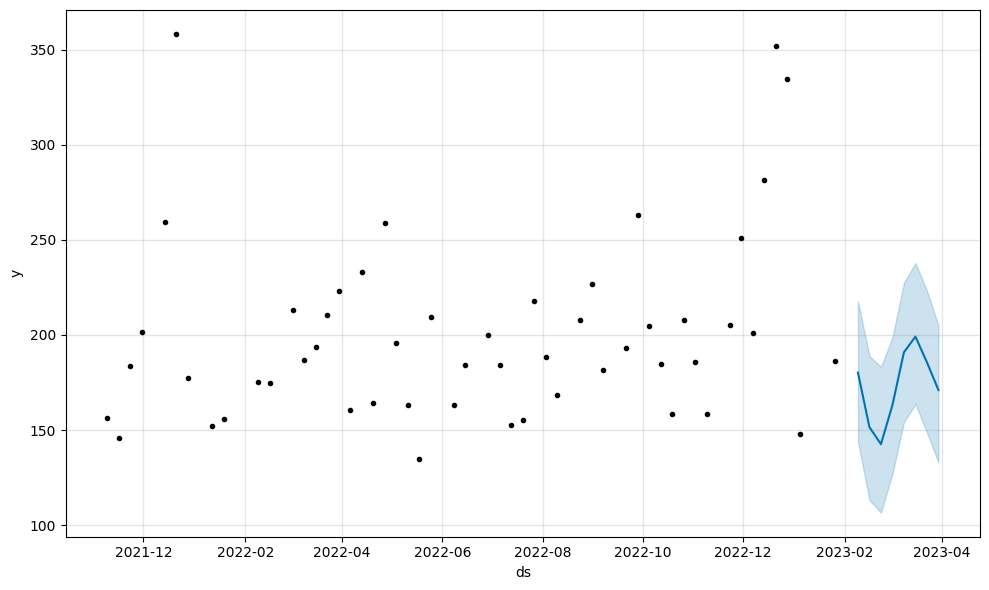

In [ ]:
#define the period for which we want a prediction
future_df_Heineken = ['2023-02-09','2023-02-16','2023-02-23','2023-03-02','2023-03-09','2023-03-16','2023-03-23','2023-03-30']
future_df_Heineken = pd.DataFrame(future_df_Heineken)
future_df_Heineken.columns = ['ds']
future_df_Heineken['ds']= pd.to_datetime(future_df_Heineken['ds'])
#make predictions
forecast_Heineken = model_Heineken.predict(future_df_Heineken)
#Plot the forecasts
model_Heineken.plot(forecast_Heineken)
pyplot.show()

In [ ]:
#summarize the forecast
print(forecast_Heineken[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(20))

          ds        yhat  yhat_lower  yhat_upper
0 2023-02-09  180.205306  143.698077  217.727396
1 2023-02-16  151.497519  113.223166  188.898116
2 2023-02-23  142.562055  106.497679  183.228935
3 2023-03-02  163.135891  126.913391  198.731264
4 2023-03-09  190.869938  154.167110  227.485276
5 2023-03-16  199.118573  163.593071  237.780335
6 2023-03-23  185.594068  148.678711  223.239563
7 2023-03-30  171.023409  132.891833  204.854761


#Sol

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/cwrt1rw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/cq171a_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97722', 'data', 'file=/tmp/tmpx941vn9x/cwrt1rw3.json', 'init=/tmp/tmpx941vn9x/cq171a_h.json', 'output', 'file=/tmp/tmpx941vn9x/prophet_modelds6kvxq9/prophet_model-20230405214834.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:48:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:48:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


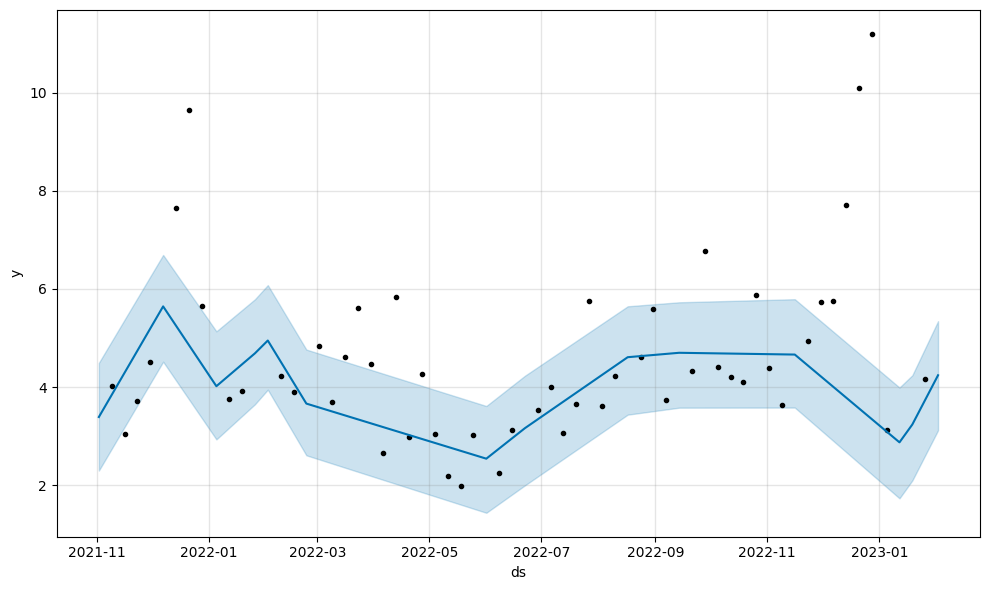

In [ ]:
#Create data subset
df_Sol = sales[sales['brand_name'] == 'SOL']
#Remove SAB
df_Sol = df_Sol[~df_Sol['brand_owner'].str.contains('SAB')]
#Remove unnecessary columns - everything except date and sales
df_Sol = df_Sol.loc[:, ["date", "volume_hl"]]

#group the dataframe by date and sum the volume_hl column
df_Sol = df_Sol.groupby('date')['volume_hl'].sum().reset_index()
df_Sol = (
df_Sol
.set_index("date")
)
#Create copy of date
df_Sol['date'] = df_Sol.index

#prepare expected column names
df_Sol.columns = ['y', 'ds']
df_Sol['ds']= pd.to_datetime(df_Sol['ds'])
#Split into training and test sets
from sklearn.model_selection import train_test_split
train_Sol, test_Sol = train_test_split(df_Sol, test_size=0.2, random_state=42)

#define the model
model_Sol = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, seasonality_mode = 'additive', holidays_prior_scale=10)

#fit the model
model_Sol.fit(train_Sol)
#make predictions on test data
test_preds_Sol = pd.DataFrame(test_Sol['ds'])
test_preds_Sol.columns = ['ds']
test_preds_Sol['ds']= pd.to_datetime(test_preds_Sol['ds'])
#Make out of sample predictions
test_preds_Sol = model_Sol.predict(test_preds_Sol)

#plot forecast
ax = model_Sol.plot(test_preds_Sol)
pyplot.show()

In [ ]:
#Calculate MAPE
pred_values_Sol = test_preds_Sol['yhat'].values
actuals_Sol = test_Sol['y'].values
mape(actuals_Sol, pred_values_Sol)
#31.128476598530924

32.707699818528006

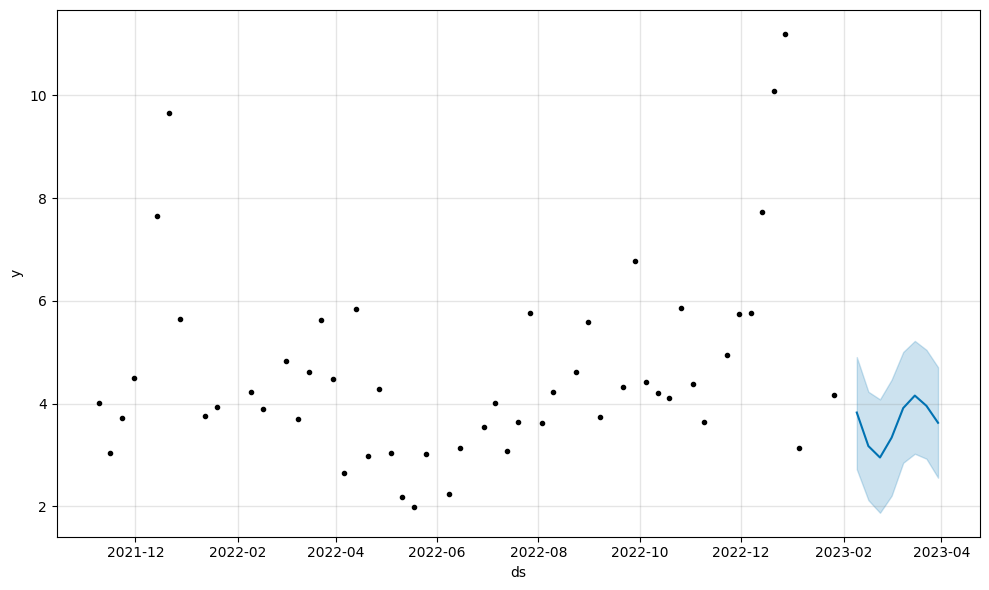

In [ ]:
#define the period for which we want a prediction
future_df_Sol = ['2023-02-09','2023-02-16','2023-02-23','2023-03-02','2023-03-09','2023-03-16','2023-03-23','2023-03-30']
future_df_Sol = pd.DataFrame(future_df_Sol)
future_df_Sol.columns = ['ds']
future_df_Sol['ds']= pd.to_datetime(future_df_Sol['ds'])
#make predictions
forecast_Sol = model_Sol.predict(future_df_Sol)
#Plot the forecasts
model_Sol.plot(forecast_Sol)
pyplot.show()

In [ ]:
#summarize the forecast
print(forecast_Sol[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(20))

          ds      yhat  yhat_lower  yhat_upper
0 2023-02-09  3.825245    2.719603    4.904679
1 2023-02-16  3.172404    2.119282    4.229714
2 2023-02-23  2.949402    1.873466    4.081723
3 2023-03-02  3.335949    2.204721    4.464439
4 2023-03-09  3.912139    2.846846    5.004333
5 2023-03-16  4.155303    3.023042    5.219562
6 2023-03-23  3.955838    2.925475    5.045560
7 2023-03-30  3.625584    2.555968    4.706620


#Soweto Gold

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/qbp79dml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/sj3v7bto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50227', 'data', 'file=/tmp/tmpx941vn9x/qbp79dml.json', 'init=/tmp/tmpx941vn9x/sj3v7bto.json', 'output', 'file=/tmp/tmpx941vn9x/prophet_modelepcsew8l/prophet_model-20230405234547.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:45:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:45:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


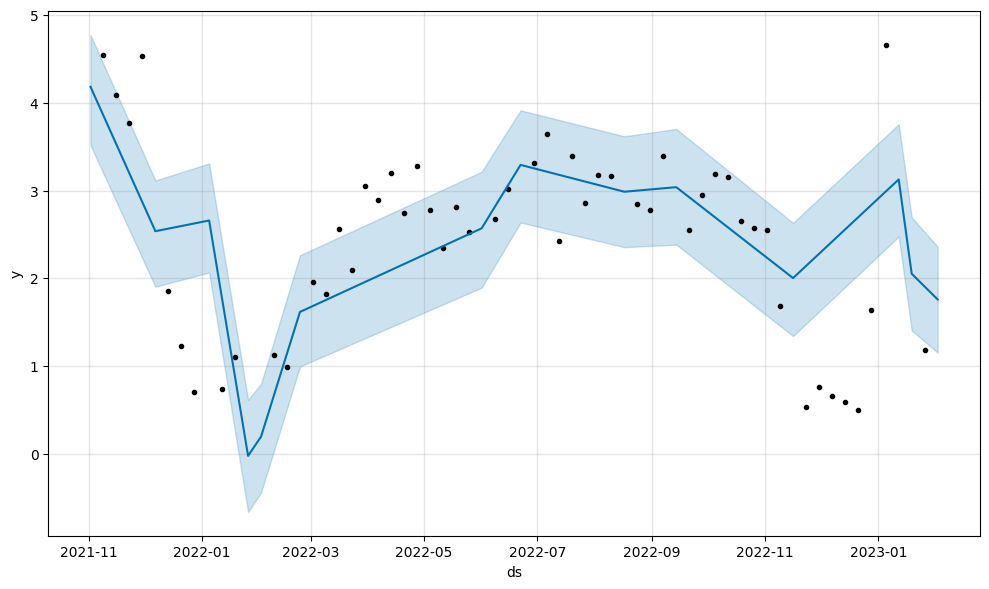

In [ ]:
#Create data subset
df_Soweto_Gold = sales[sales['brand_name'] == 'SOWETO GOLD']
#Remove SAB
df_Soweto_Gold = df_Soweto_Gold[~df_Soweto_Gold['brand_owner'].str.contains('SAB')]
#Remove unnecessary columns - everything except date and sales
df_Soweto_Gold = df_Soweto_Gold.loc[:, ["date", "volume_hl"]]

#group the dataframe by date and sum the volume_hl column
df_Soweto_Gold = df_Soweto_Gold.groupby('date')['volume_hl'].sum().reset_index()
df_Soweto_Gold = (
df_Soweto_Gold
.set_index("date")
)
#Create copy of date
df_Soweto_Gold['date'] = df_Soweto_Gold.index

#prepare expected column names
df_Soweto_Gold.columns = ['y', 'ds']
df_Soweto_Gold['ds']= pd.to_datetime(df_Soweto_Gold['ds'])
#Split into training and test sets
from sklearn.model_selection import train_test_split
train_Soweto_Gold, test_Soweto_Gold = train_test_split(df_Soweto_Gold, test_size=0.2, random_state=42)

#define the model
model_Soweto_Gold = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, seasonality_mode = 'additive', holidays_prior_scale=10)

#fit the model
model_Soweto_Gold.fit(train_Soweto_Gold)
#make predictions on test data
test_preds_Soweto_Gold = pd.DataFrame(test_Soweto_Gold['ds'])
test_preds_Soweto_Gold.columns = ['ds']
test_preds_Soweto_Gold['ds']= to_datetime(test_preds_Soweto_Gold['ds'])
#Make out of sample predictions
test_preds_Soweto_Gold = model_Soweto_Gold.predict(test_preds_Soweto_Gold)

#plot forecast
ax = model_Soweto_Gold.plot(test_preds_Soweto_Gold)
pyplot.show()

In [ ]:
#Calculate MAPE
pred_values_Soweto_Gold = test_preds_Soweto_Gold['yhat'].values
actuals_Soweto_Gold = test_Soweto_Gold['y'].values
mape(actuals_Soweto_Gold, pred_values_Soweto_Gold)

114.2494520166475

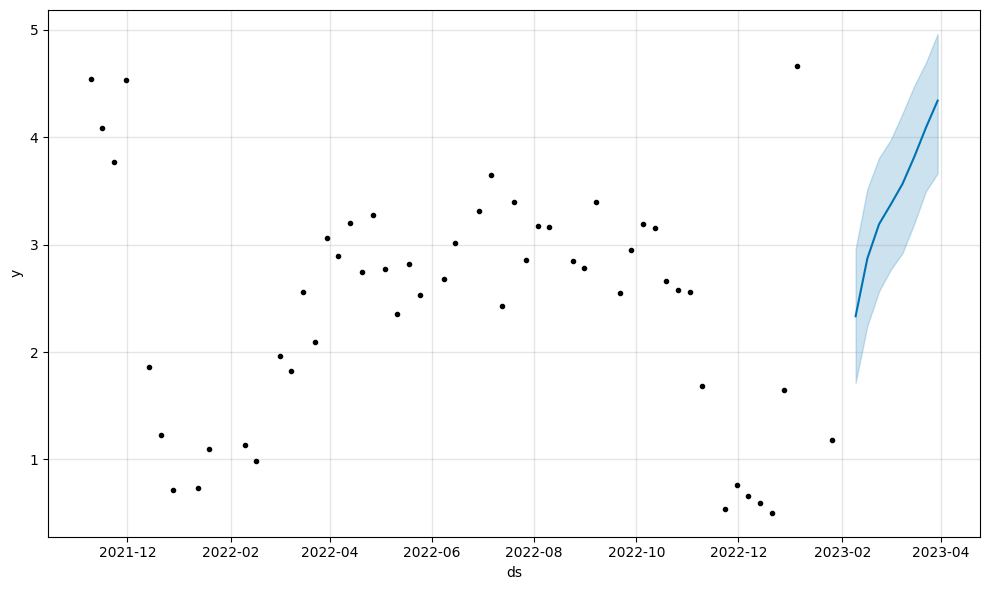

          ds      yhat  yhat_lower  yhat_upper
0 2023-02-09  2.332771    1.714626    2.958155
1 2023-02-16  2.869056    2.241725    3.515789
2 2023-02-23  3.189439    2.564822    3.805276
3 2023-03-02  3.372944    2.766251    3.974307
4 2023-03-09  3.564095    2.920600    4.218321
5 2023-03-16  3.814149    3.193296    4.474307
6 2023-03-23  4.087081    3.495687    4.692566
7 2023-03-30  4.339113    3.662282    4.959700


In [ ]:
#define the period for which we want a prediction
future_df_Soweto_Gold = ['2023-02-09','2023-02-16','2023-02-23','2023-03-02','2023-03-09','2023-03-16','2023-03-23','2023-03-30']
future_df_Soweto_Gold = pd.DataFrame(future_df_Soweto_Gold)
future_df_Soweto_Gold.columns = ['ds']
future_df_Soweto_Gold['ds']= to_datetime(future_df_Soweto_Gold['ds'])
#make predictions
forecast_Soweto_Gold = model_Soweto_Gold.predict(future_df_Soweto_Gold)
#Plot the forecasts
model_Soweto_Gold.plot(forecast_Soweto_Gold)
pyplot.show()

#summarize the forecast
print(forecast_Soweto_Gold[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(20))

#Tafel Lager

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/hgbows1g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/9593bgpq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82423', 'data', 'file=/tmp/tmpx941vn9x/hgbows1g.json', 'init=/tmp/tmpx941vn9x/9593bgpq.json', 'output', 'file=/tmp/tmpx941vn9x/prophet_modeldv4lg9zd/prophet_model-20230405222005.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:20:05 - cmdstanpy - INFO - Chain [1] start processing
IN

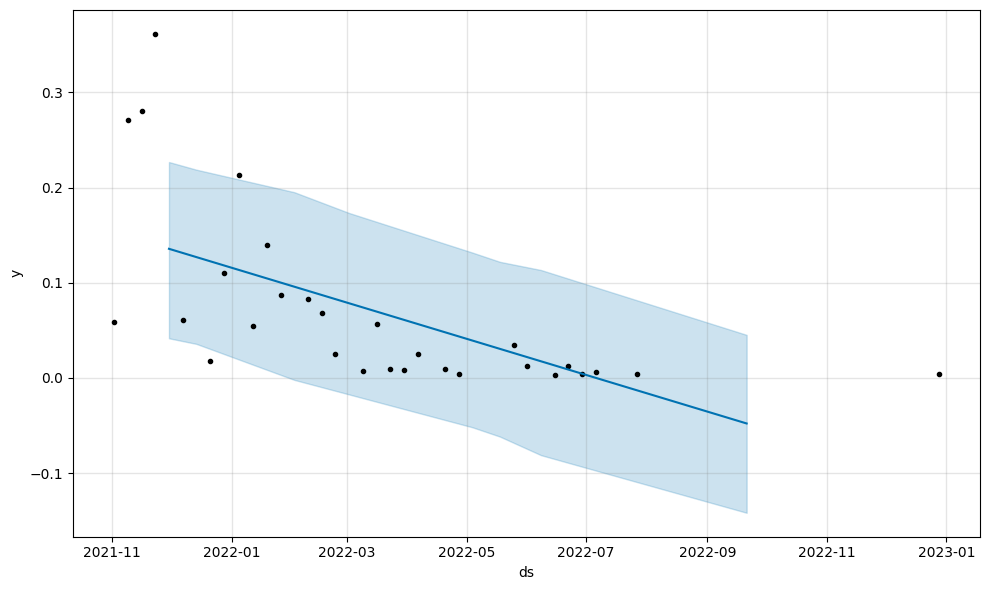

In [ ]:
#Create data subset
df_Tafel_Lager = sales[sales['brand_name'] == 'TAFEL LAGER']
#Remove SAB
df_Tafel_Lager = df_Tafel_Lager[~df_Tafel_Lager['brand_owner'].str.contains('SAB')]
#Remove unnecessary columns - everything except date and sales
df_Tafel_Lager = df_Tafel_Lager.loc[:, ["date", "volume_hl"]]

#group the dataframe by date and sum the volume_hl column
df_Tafel_Lager = df_Tafel_Lager.groupby('date')['volume_hl'].sum().reset_index()
df_Tafel_Lager = (
df_Tafel_Lager
.set_index("date")
)
#Create copy of date
df_Tafel_Lager['date'] = df_Tafel_Lager.index

#prepare expected column names
df_Tafel_Lager.columns = ['y', 'ds']
df_Tafel_Lager['ds']= pd.to_datetime(df_Tafel_Lager['ds'])
#Split into training and test sets
from sklearn.model_selection import train_test_split
train_Tafel_Lager, test_Tafel_Lager = train_test_split(df_Tafel_Lager, test_size=0.2, random_state=42)

#define the model
model_Tafel_Lager = Prophet()

#fit the model
model_Tafel_Lager.fit(train_Tafel_Lager)
#make predictions on test data
test_preds_Tafel_Lager = pd.DataFrame(test_Tafel_Lager['ds'])
test_preds_Tafel_Lager.columns = ['ds']
test_preds_Tafel_Lager['ds']= to_datetime(test_preds_Tafel_Lager['ds'])
#Make out of sample predictions
test_preds_Tafel_Lager = model_Tafel_Lager.predict(test_preds_Tafel_Lager)

#plot forecast
ax = model_Tafel_Lager.plot(test_preds_Tafel_Lager)
pyplot.show()

In [ ]:
#Calculate MAPE
pred_values_Tafel_Lager = test_preds_Tafel_Lager['yhat'].values
actuals_Tafel_Lager = test_Tafel_Lager['y'].values
mape(actuals_Tafel_Lager, pred_values_Tafel_Lager)

506.7036089453941

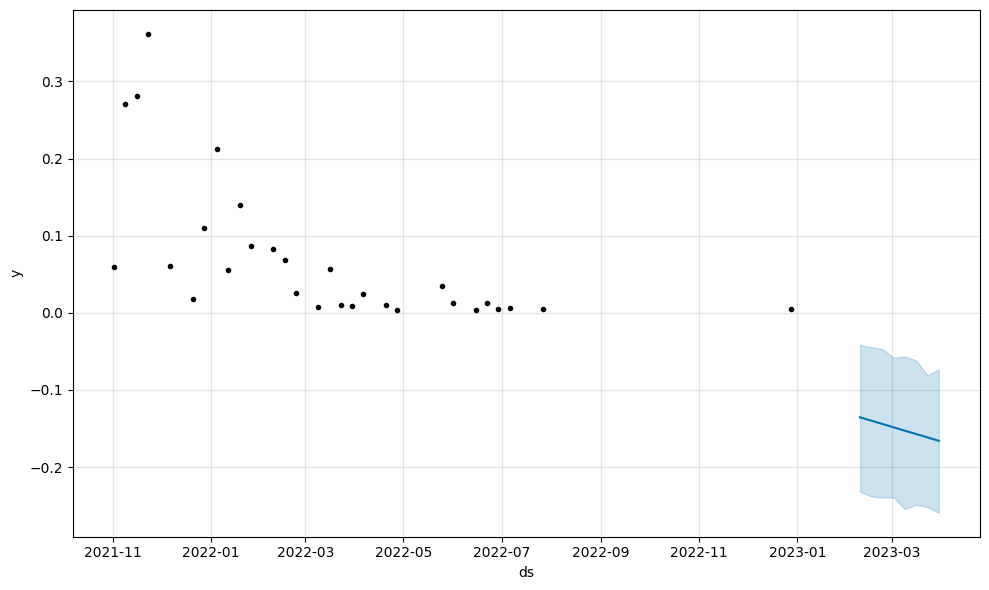

In [ ]:
#define the period for which we want a prediction
future_df_Tafel_Lager = ['2023-02-09','2023-02-16','2023-02-23','2023-03-02','2023-03-09','2023-03-16','2023-03-23','2023-03-30']
future_df_Tafel_Lager = pd.DataFrame(future_df_Tafel_Lager)
future_df_Tafel_Lager.columns = ['ds']
future_df_Tafel_Lager['ds']= to_datetime(future_df_Tafel_Lager['ds'])
#make predictions
forecast_Tafel_Lager = model_Tafel_Lager.predict(future_df_Tafel_Lager)
#Plot the forecasts
model_Tafel_Lager.plot(forecast_Tafel_Lager)
pyplot.show()

In [ ]:
#summarize the forecast
print(forecast_Tafel_Lager[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(20))

          ds      yhat  yhat_lower  yhat_upper
0 2023-02-09 -0.140010   -0.165449   -0.115780
1 2023-02-16 -0.159602   -0.184346   -0.132468
2 2023-02-23 -0.180969   -0.206207   -0.153435
3 2023-03-02 -0.207043   -0.232679   -0.182689
4 2023-03-09 -0.233287   -0.259604   -0.209401
5 2023-03-16 -0.255761   -0.283586   -0.231169
6 2023-03-23 -0.277781   -0.301415   -0.251481
7 2023-03-30 -0.303725   -0.329281   -0.280233


For this product, because there are such few data points and the volume is relatively low, our model had difficutly predicting. Therefore we decided to predict out based on a growth rate.

#Windhoek Draught

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/i3vfpikm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/llbe6xgl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99612', 'data', 'file=/tmp/tmpx941vn9x/i3vfpikm.json', 'init=/tmp/tmpx941vn9x/llbe6xgl.json', 'output', 'file=/tmp/tmpx941vn9x/prophet_model4yg5jaae/prophet_model-20230405221803.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:18:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


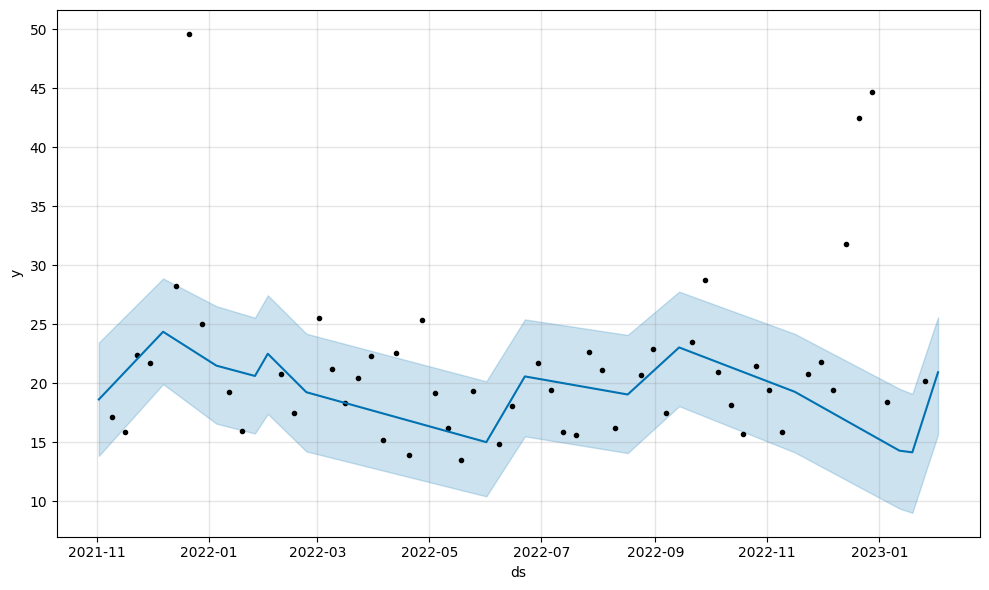

In [ ]:
#Create data subset
df_Windhoek_Draught = sales[sales['brand_name'] == 'WINDHOEK DRAUGHT']
#Remove SAB
df_Windhoek_Draught = df_Windhoek_Draught[~df_Windhoek_Draught['brand_owner'].str.contains('SAB')]
#Remove unnecessary columns - everything except date and sales
df_Windhoek_Draught = df_Windhoek_Draught.loc[:, ["date", "volume_hl"]]

#group the dataframe by date and sum the volume_hl column
df_Windhoek_Draught = df_Windhoek_Draught.groupby('date')['volume_hl'].sum().reset_index()
df_Windhoek_Draught = (
df_Windhoek_Draught
.set_index("date")
)
#Create copy of date
df_Windhoek_Draught['date'] = df_Windhoek_Draught.index

#prepare expected column names
df_Windhoek_Draught.columns = ['y', 'ds']
df_Windhoek_Draught['ds']= pd.to_datetime(df_Windhoek_Draught['ds'])
#Split into training and test sets
from sklearn.model_selection import train_test_split
train_Windhoek_Draught, test_Windhoek_Draught = train_test_split(df_Windhoek_Draught, test_size=0.2, random_state=42)

#define the model
model_Windhoek_Draught = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, seasonality_mode = 'multiplicative', holidays_prior_scale=10, changepoint_prior_scale=0.5)

#fit the model
model_Windhoek_Draught.fit(train_Windhoek_Draught)
#make predictions on test data
test_preds_Windhoek_Draught = pd.DataFrame(test_Windhoek_Draught['ds'])
test_preds_Windhoek_Draught.columns = ['ds']
test_preds_Windhoek_Draught['ds']= to_datetime(test_preds_Windhoek_Draught['ds'])
#Make out of sample predictions
test_preds_Windhoek_Draught = model_Windhoek_Draught.predict(test_preds_Windhoek_Draught)

#plot forecast
ax = model_Windhoek_Draught.plot(test_preds_Windhoek_Draught)
pyplot.show()

In [ ]:
#Calculate MAPE
pred_values_Windhoek_Draught = test_preds_Windhoek_Draught['yhat'].values
actuals_Windhoek_Draught = test_Windhoek_Draught['y'].values
mape(actuals_Windhoek_Draught, pred_values_Windhoek_Draught)

18.985876679822617

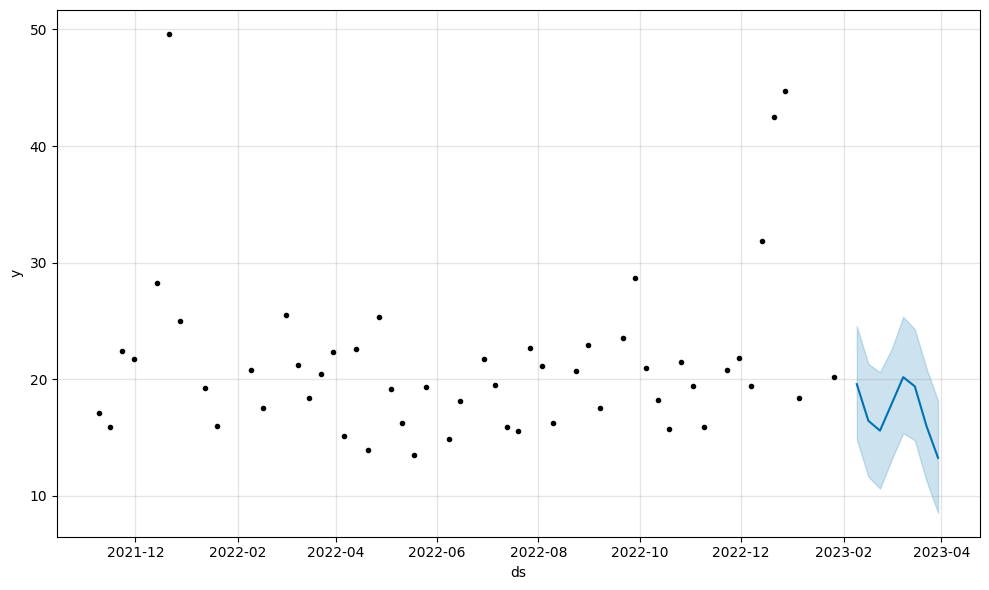

In [ ]:
#define the period for which we want a prediction
future_df_Windhoek_Draught = ['2023-02-09','2023-02-16','2023-02-23','2023-03-02','2023-03-09','2023-03-16','2023-03-23','2023-03-30']
future_df_Windhoek_Draught = pd.DataFrame(future_df_Windhoek_Draught)
future_df_Windhoek_Draught.columns = ['ds']
future_df_Windhoek_Draught['ds']= pd.to_datetime(future_df_Windhoek_Draught['ds'])
#make predictions
forecast_Windhoek_Draught = model_Windhoek_Draught.predict(future_df_Windhoek_Draught)
#Plot the forecasts
model_Windhoek_Draught.plot(forecast_Windhoek_Draught)
pyplot.show()

In [ ]:
#summarize
print(forecast_Windhoek_Draught[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(20))

          ds       yhat  yhat_lower  yhat_upper
0 2023-02-09  19.581507   14.844748   24.552048
1 2023-02-16  16.437157   11.647726   21.315683
2 2023-02-23  15.591827   10.618588   20.599736
3 2023-03-02  17.877942   13.090813   22.571680
4 2023-03-09  20.180892   15.386122   25.347483
5 2023-03-16  19.391172   14.754677   24.288951
6 2023-03-23  16.002996   11.300580   20.944066
7 2023-03-30  13.258975    8.548649   18.152453


#Windhoek Lager

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/jx8gawgw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/wc37bpqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85308', 'data', 'file=/tmp/tmpx941vn9x/jx8gawgw.json', 'init=/tmp/tmpx941vn9x/wc37bpqr.json', 'output', 'file=/tmp/tmpx941vn9x/prophet_modelaa_6ys37/prophet_model-20230405221531.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:15:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:15:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


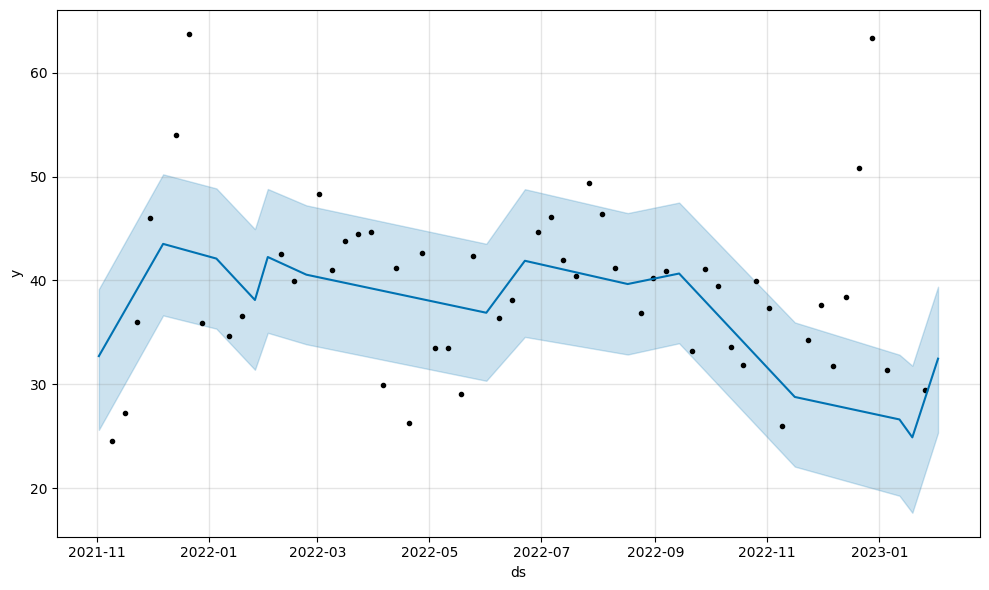

In [ ]:
#Create data subset
df_Windhoek_Lager = sales[sales['brand_name'] == 'WINDHOEK LAGER']
#Remove SAB
df_Windhoek_Lager = df_Windhoek_Lager[~df_Windhoek_Lager['brand_owner'].str.contains('SAB')]
#Remove unnecessary columns - everything except date and sales
df_Windhoek_Lager = df_Windhoek_Lager.loc[:, ["date", "volume_hl"]]

#group the dataframe by date and sum the volume_hl column
df_Windhoek_Lager = df_Windhoek_Lager.groupby('date')['volume_hl'].sum().reset_index()
df_Windhoek_Lager = (
df_Windhoek_Lager
.set_index("date")
)
#Create copy of date
df_Windhoek_Lager['date'] = df_Windhoek_Lager.index

#prepare expected column names
df_Windhoek_Lager.columns = ['y', 'ds']
df_Windhoek_Lager['ds']= pd.to_datetime(df_Windhoek_Lager['ds'])
#Split into training and test sets
from sklearn.model_selection import train_test_split
train_Windhoek_Lager, test_Windhoek_Lager = train_test_split(df_Windhoek_Lager, test_size=0.2, random_state=42)

#define the model
model_Windhoek_Lager = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, seasonality_mode = 'multiplicative', holidays_prior_scale=10)

#fit the model
model_Windhoek_Lager.fit(train_Windhoek_Lager)
#make predictions on test data
test_preds_Windhoek_Lager = pd.DataFrame(test_Windhoek_Lager['ds'])
test_preds_Windhoek_Lager.columns = ['ds']
test_preds_Windhoek_Lager['ds']= pd.to_datetime(test_preds_Windhoek_Lager['ds'])
#Make out of sample predictions
test_preds_Windhoek_Lager = model_Windhoek_Lager.predict(test_preds_Windhoek_Lager)

#plot forecast
ax = model_Windhoek_Lager.plot(test_preds_Windhoek_Lager)
pyplot.show()


In [ ]:
#Calculate MAPE
pred_values_Windhoek_Lager = test_preds_Windhoek_Lager['yhat'].values
actuals_Windhoek_Lager = test_Windhoek_Lager['y'].values
mape(actuals_Windhoek_Lager, pred_values_Windhoek_Lager)

25.431403508881434

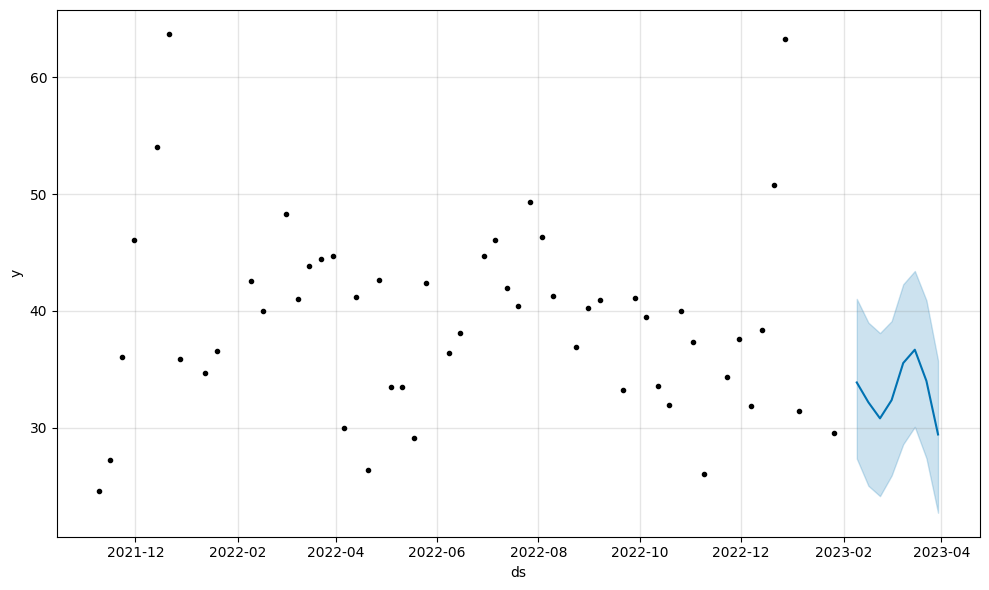

In [ ]:
#define the period for which we want a prediction
future_df_Windhoek_Lager = ['2023-02-09','2023-02-16','2023-02-23','2023-03-02','2023-03-09','2023-03-16','2023-03-23','2023-03-30']
future_df_Windhoek_Lager = pd.DataFrame(future_df_Windhoek_Lager)
future_df_Windhoek_Lager.columns = ['ds']
future_df_Windhoek_Lager['ds']= pd.to_datetime(future_df_Windhoek_Lager['ds'])
#make predictions
forecast_Windhoek_Lager = model_Windhoek_Lager.predict(future_df_Windhoek_Lager)
#Plot the forecasts
model_Windhoek_Lager.plot(forecast_Windhoek_Lager)
pyplot.show()

In [ ]:
#summarize
print(forecast_Windhoek_Lager[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(20))


          ds       yhat  yhat_lower  yhat_upper
0 2023-02-09  33.866362   27.344547   41.026066
1 2023-02-16  32.168033   25.013984   38.992340
2 2023-02-23  30.792167   24.129949   38.096697
3 2023-03-02  32.351526   25.891088   39.119357
4 2023-03-09  35.529074   28.573051   42.276905
5 2023-03-16  36.671872   30.064458   43.414951
6 2023-03-23  33.993536   27.366608   40.897674
7 2023-03-30  29.410527   22.702276   35.743112


#Windhoek Light

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/39j5cp64.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx941vn9x/lo_ob97s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73196', 'data', 'file=/tmp/tmpx941vn9x/39j5cp64.json', 'init=/tmp/tmpx941vn9x/lo_ob97s.json', 'output', 'file=/tmp/tmpx941vn9x/prophet_model3ja13h65/prophet_model-20230405221319.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:13:19 - cmdstanpy - INFO - Chain [1] start processing
INF

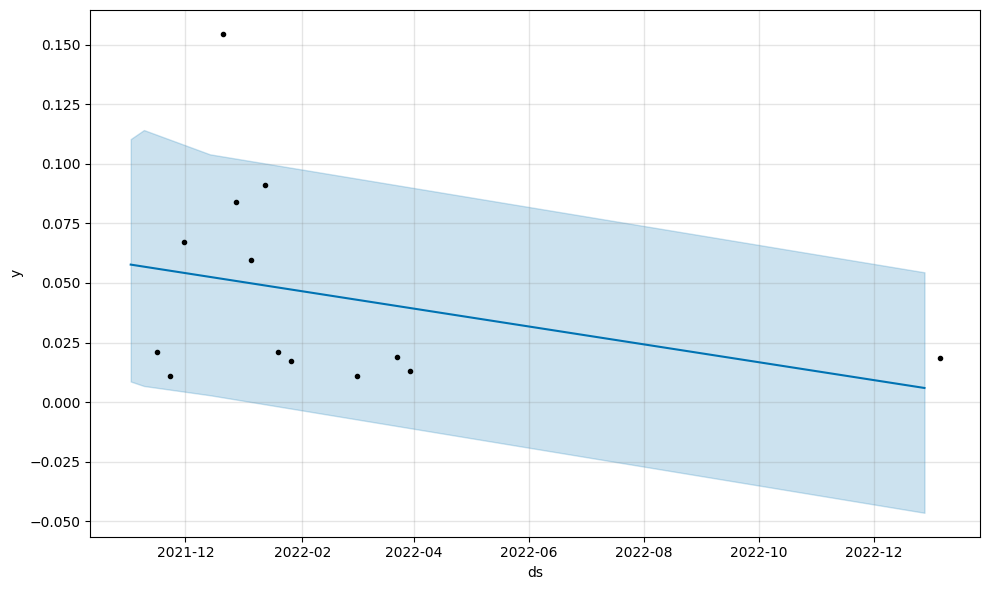

In [ ]:
#Create data subset
df_Windhoek_Light = sales[sales['brand_name'] == 'WINDHOEK LIGHT']
#Remove SAB
df_Windhoek_Light = df_Windhoek_Light[~df_Windhoek_Light['brand_owner'].str.contains('SAB')]
#Remove unnecessary columns - everything except date and sales
df_Windhoek_Light = df_Windhoek_Light.loc[:, ["date", "volume_hl"]]

#group the dataframe by date and sum the volume_hl column
df_Windhoek_Light = df_Windhoek_Light.groupby('date')['volume_hl'].sum().reset_index()
df_Windhoek_Light = (
df_Windhoek_Light
.set_index("date")
)
#Create copy of date
df_Windhoek_Light['date'] = df_Windhoek_Light.index

#prepare expected column names
df_Windhoek_Light.columns = ['y', 'ds']
df_Windhoek_Light['ds']= pd.to_datetime(df_Windhoek_Light['ds'])

#Split into training and test sets
from sklearn.model_selection import train_test_split
train_Windhoek_Light, test_Windhoek_Light = train_test_split(df_Windhoek_Light, test_size=0.2, random_state=42)

#define the model
model_Windhoek_Light = Prophet()

#fit the model
model_Windhoek_Light.fit(train_Windhoek_Light)

#make predictions on test data
test_preds_Windhoek_Light = pd.DataFrame(test_Windhoek_Light['ds'])
test_preds_Windhoek_Light.columns = ['ds']
test_preds_Windhoek_Light['ds']= pd.to_datetime(test_preds_Windhoek_Light['ds'])

#Make out of sample predictions
test_preds_Windhoek_Light = model_Windhoek_Light.predict(test_preds_Windhoek_Light)

#plot forecast
ax = model_Windhoek_Light.plot(test_preds_Windhoek_Light)
pyplot.show()

In [ ]:
#Calculate MAPE
pred_values_Windhoek_Light = test_preds_Windhoek_Light['yhat'].values
actuals_Windhoek_Light = test_Windhoek_Light['y'].values
mape(actuals_Windhoek_Light, pred_values_Windhoek_Light)

122.68295584330158

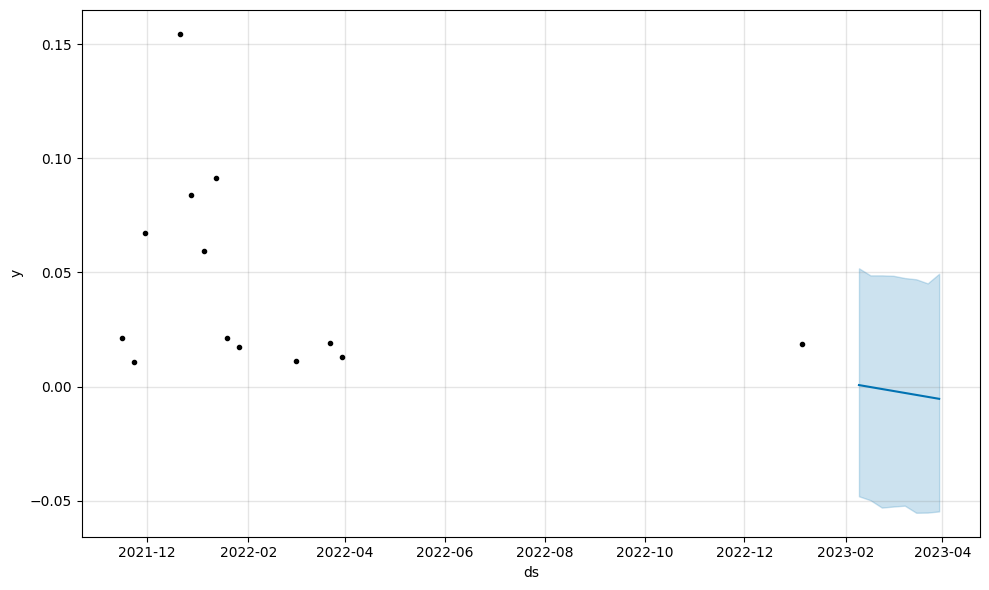

In [ ]:
#define the period for which we want a prediction
future_df_Windhoek_Light = ['2023-02-09','2023-02-16','2023-02-23','2023-03-02','2023-03-09','2023-03-16','2023-03-23','2023-03-30']
future_df_Windhoek_Light = pd.DataFrame(future_df_Windhoek_Light)
future_df_Windhoek_Light.columns = ['ds']
future_df_Windhoek_Light['ds']= pd.to_datetime(future_df_Windhoek_Light['ds'])
#make predictions
forecast_Windhoek_Light = model_Windhoek_Light.predict(future_df_Windhoek_Light)
#Plot the forecasts
model_Windhoek_Light.plot(forecast_Windhoek_Light)
pyplot.show()

In [ ]:
#summarize
print(forecast_Windhoek_Light[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(20))

          ds      yhat  yhat_lower  yhat_upper
0 2023-02-09  0.000635   -0.048123    0.051828
1 2023-02-16 -0.000226   -0.049828    0.048725
2 2023-02-23 -0.001087   -0.053080    0.048730
3 2023-03-02 -0.001948   -0.052614    0.048552
4 2023-03-09 -0.002810   -0.052233    0.047557
5 2023-03-16 -0.003671   -0.055345    0.047008
6 2023-03-23 -0.004532   -0.055260    0.045228
7 2023-03-30 -0.005393   -0.054747    0.049441


For this product, because there are such few data points and the volume is relatively low, our model had difficutly predicting. Therefore we decided to predict out based on a growth rate.

